In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from scipy.stats import skew
from math import sqrt

warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
df = pd.read_csv('C:/Users/STEVEN/Documents/Thinkful/Files/Cancer/breast_cancer.csv')

In [50]:
df.head()

,ID,Thickness,Uniformity_size,Uniformity_shape,Marginal Adhesion,Single_size,Bare_Nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [51]:
df.dtypes


ID                    int64
Thickness             int64
Uniformity_size       int64
Uniformity_shape      int64
Marginal Adhesion     int64
Single_size           int64
Bare_Nuclei          object
Bland_chromatin       int64
Normal_nucleoli       int64
Mitoses               int64
Class                 int64
dtype: object

In [52]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].str.replace('?', '')


In [53]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [54]:
df.dtypes

ID                     int64
Thickness              int64
Uniformity_size        int64
Uniformity_shape       int64
Marginal Adhesion      int64
Single_size            int64
Bare_Nuclei          float64
Bland_chromatin        int64
Normal_nucleoli        int64
Mitoses                int64
Class                  int64
dtype: object

In [55]:
df['Bare_Nuclei'] = df.groupby('Class')['Bare_Nuclei'].transform(lambda x:x.fillna(x.median()))

In [56]:
X = df.drop('Class', axis=1)
y = df.Class

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.40, random_state=42)

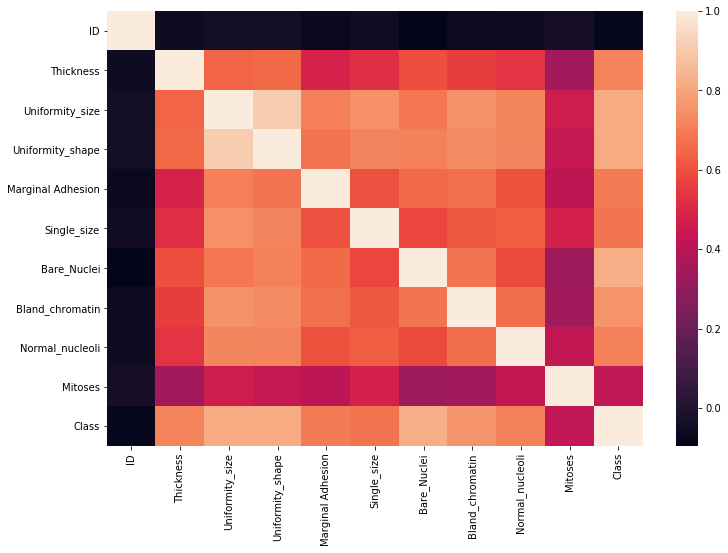

In [58]:
#Now that we are all set up for the Testing using KNN
_, ax = plt.subplots(ncols=1, figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

From this we can see that Id has no relation to anything which is what we would expect.  Size, shape, and bare nuclei seems to have the highest correlation.  Let's begin setting up our test. 

Something to further investigate is if the 16 data points from the missing values may be the reason for this higher correlation of Bare_Nuclei.  



In [59]:
#Dropping ID

X_train = X_train.drop('ID', axis=1)
X_test = X_test.drop('ID', axis=1)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

kNN = KNeighborsClassifier(n_neighbors=6, weights='distance')

kNN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [63]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(kNN, X_train, y_train, cv=5)
print(score)

[0.92941176 0.97619048 0.97619048 0.97590361 0.95180723]


In [65]:
kNN.fit(X_test, y_test)
score2 = cross_val_score(kNN, X_test, y_test, cv=5)
print(score2)

[0.96428571 0.94642857 0.94642857 0.98214286 0.98214286]
